## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

./camera_cal/calibration1.jpg


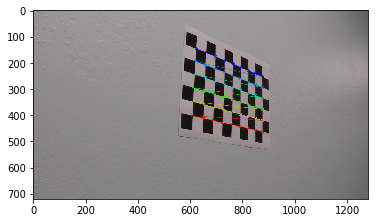

In [19]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import project4
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')
sampleImage = cv2.imread(images[0])
print(images[0])

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)

cv2.destroyAllWindows()

## Then we calibrate the camera

In [15]:
imageShape = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imageShape, None, None)

## Then we undistort the image

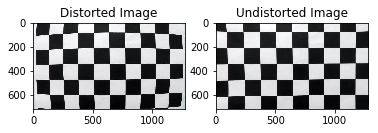

In [22]:
undistortedImage = cv2.undistort(sampleImage, mtx, dist, None, mtx)
plt.subplot(1,2,1)
plt.imshow(sampleImage)
plt.title('Distorted Image')
plt.subplot(1,2,2)
plt.imshow(undistortedImage)
plt.title('Undistorted Image')

## Now do it for all images (May be able to remove this block)

In [29]:
output_folder = './output_images/'

for fname in images:
    start = fname.rindex('/') + 1 # Start the name from after the '/'
    end = fname.rindex('.') # End at the dot so as to not have ".jpg" twice
    output_path = output_folder + fname[start:end] + "-undistorted"+ '.jpg'
    
    image = cv2.imread(fname)
    undistorted =  cv2.undistort(image, mtx, dist, None, mtx)
    cv2.imwrite(output_path, undistorted)
    

./output_images/calibration1-undistorted.jpg
./output_images/calibration10-undistorted.jpg
./output_images/calibration11-undistorted.jpg
./output_images/calibration12-undistorted.jpg
./output_images/calibration13-undistorted.jpg
./output_images/calibration14-undistorted.jpg
./output_images/calibration15-undistorted.jpg
./output_images/calibration16-undistorted.jpg
./output_images/calibration17-undistorted.jpg
./output_images/calibration18-undistorted.jpg
./output_images/calibration19-undistorted.jpg
./output_images/calibration2-undistorted.jpg
./output_images/calibration20-undistorted.jpg
./output_images/calibration3-undistorted.jpg
./output_images/calibration4-undistorted.jpg
./output_images/calibration5-undistorted.jpg
./output_images/calibration6-undistorted.jpg
./output_images/calibration7-undistorted.jpg
./output_images/calibration8-undistorted.jpg
./output_images/calibration9-undistorted.jpg
